# Statistical details of COVID-19 in India

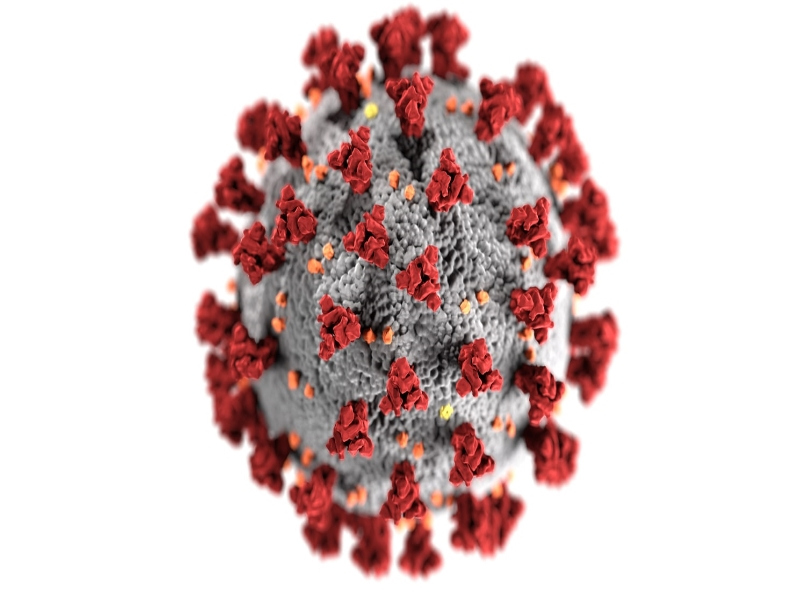


    Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19. The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces. You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import date, timedelta
import os

# Current situation in India in terms of Cured vs Deaths vs Active cases

In [ ]:
covid=pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')

current = covid[covid["Date"]==(str((date.today()-timedelta(days=1)).strftime("%d/%m/%y")))].reset_index().drop(columns = ['index', "Sno"])
current.iloc[-2],current.iloc[-3] = current.iloc[-3].copy(), current.iloc[-2].copy() # due to problems in names of uttarpradesh and uttarkhand

for i in ["Cured", "Deaths", "Confirmed"]:
    val = ((current[current["State/UnionTerritory"]=="Jammu and Kashmir"][i]).values+(current[current["State/UnionTerritory"]=="Ladakh"][i]).values)
    current.at[current[current["State/UnionTerritory"]=="Jammu and Kashmir"].index,i] = val
current = current.drop([(current[current["State/UnionTerritory"]=="Ladakh"].index)[0]]).reset_index().drop(columns = ['index'])

plt.figure(figsize= (15,10))
activities = ['Cured', 'Deaths', 'active']
colors = ['green', 'orange', 'blue']
explode=(0, 0.1, 0.01)
plt.pie([sum(current['Cured']), sum(current['Deaths']), sum(current['Confirmed'])-(sum(current['Deaths'])+sum(current['Cured']))], 
                                                                                   labels=activities,
                                                                                   explode=explode,
                                                                                   colors=colors,
                                                                                   startangle=90,
                                                                                   autopct='%1.1f%%',
                                                                                   shadow=True)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.show()

# Which age groups are affected the most!

In [ ]:
age_details = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
explode = []
for i in  list(age_details['AgeGroup']):
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(list(age_details['TotalCases']), labels= list(age_details['AgeGroup']), autopct='%1.1f%%', startangle=9, explode =explode, shadow = True)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.show()

It could been seen that that the age group **under 40 is the most affected** and only 17% of people above 60 are affected. This is against the trend which says elderly people are more at risk of being affected. 


In [ ]:
individual_details = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
pattern = (list(individual_details['gender'].value_counts()))
plt.figure(figsize= (15,10))
plt.pie(pattern, labels = ['Male', 'Female'], autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.show()

As so many date are missing(which is more than 65%), the exact gender-wise density is still not clear. 

In [ ]:
start_date = date(2020, 3, 15)
end_date = date.today()
delta = timedelta(days=1)
end_date = end_date-delta
daily_mortality = []
daily_cured = []
dates = []
while start_date <= end_date:
    daily = covid[covid["Date"]==(str(start_date.strftime("%d/%m/%y")))]
    try:
        mor = sum(daily['Deaths']) / (sum(daily['Confirmed'])-(sum(daily['Cured'])+sum(daily['Deaths'])))
    except ZeroDivisionError:
        mor = 0.0
    try:
        cur = sum(daily['Cured']) / (sum(daily['Confirmed'])-(sum(daily['Cured'])+sum(daily['Deaths'])))
    except ZeroDivisionError:
        cur = 0.0
    start_date += delta
    dates.append(str(start_date.strftime("%d/%m/%y")))
    daily_mortality.append(mor)
    daily_cured.append(cur)
    
plt.figure(figsize=(16,7))
plt.plot(dates,daily_mortality)
plt.plot(dates,daily_cured)
plt.xticks(dates, dates)
plt.xticks(rotation=90)
plt.xlabel("dates")
plt.ylabel("Mortality rates")
plt.title("Mortality rates from may 1st 2020", size=30)
plt.show()

It is a good sign that the recovery rate is increasing rapidly.

# Healthcare capacities in India

As per [https://en.wikipedia.org/wiki/Public_health_system_in_India](http://), the healthcare system is organised into primary, secondary, and tertiary levels. At the primary level are Sub Centres and Primary Health Centres (PHCs). At the secondary level there are Community Health Centres (CHCs) and smaller Sub-District hospitals. Finally, the top level of public care provided by the government is the tertiary level, which consists of Medical Colleges and District Hospitals. 

Tertiary level of medical care is required to treat Covid-19 as it is necessary to isolate all the patients ranging from mild to critical symptoms. In most of the Indian states, Distict hospitals and goverment medical colleges are considered for housing patients with this virus.

The below is the representation of state-wise hospital.

In [ ]:
num_per_hospital = 1000
hospital_beds = pd.read_csv("/kaggle/input/covid19-in-india/HospitalBedsIndia.csv")
distict_hospitals = hospital_beds[['State/UT', 'NumDistrictHospitals_HMIS']]
height1=distict_hospitals['NumDistrictHospitals_HMIS'][:-1].reset_index().drop(columns = ['index'])
height2=current[['State/UnionTerritory','Confirmed']].reset_index().drop(columns = ['index'])
bars=distict_hospitals['State/UT'][:-1]
i = j = 0
while j != len(height2['State/UnionTerritory']):
    if (bars[i][:3].lower() != height2['State/UnionTerritory'][j][:3].lower()):
        height1 = height1.drop([i])
        bars = bars.drop([i])    
        i+=1
        continue
    j+=1
    i+=1

plt.figure(figsize=(16,4))
y_pos = np.arange(len(bars))
plt.bar(y_pos, height1['NumDistrictHospitals_HMIS']*num_per_hospital, color = 'blue',alpha=0.5, label = 'beds')
plt.bar(y_pos, height2['Confirmed'], color = 'red', label = 'patients')
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("no. of hospitals")
plt.title("Number of hospitals (Statewise)", size = 40)
plt.legend()
plt.show()

In [ ]:
testing = pd.read_csv("/kaggle/input/covid19-in-india/ICMRTestingLabs.csv")
pop = pd.read_csv("/kaggle/input/covid19-in-india/population_india_census2011.csv")
population = pop[["State / Union Territory", "Population"]]

testing_centers = testing['state'].value_counts().to_dict()
population_statewise = []
for i in testing_centers.keys():
    if i == "Telangana":
        i = 'Telengana'
    population_statewise.append(population[population["State / Union Territory"]==i]["Population"].values[0])
    
plt.figure(figsize=(16,4))
y_pos = np.arange(len(list(testing_centers.values())))
plt.bar(y_pos, list(testing_centers.values()), color = 'blue', label = 'Testing centers')
plt.xticks(y_pos, list(testing_centers.keys()))
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("no. of labs")
plt.title("Number of Testing labs (Statewise)", size = 30)
plt.legend()
plt.show()

In [ ]:
pop_rate = []
for i in range(len(list(testing_centers.values()))):
    pop_rate.append(population_statewise[i]/list(testing_centers.values())[i])
plt.figure(figsize=(16,4))
width = 0.35  
y_pos = np.arange(len(pop_rate))
plt.bar(y_pos, pop_rate, color = 'blue', label = 'no. of peoples')
plt.xticks(y_pos, list(testing_centers.keys()))
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("population in crores")
plt.title("Number of People per Testing labs (Statewise)", size = 30)
plt.legend()
plt.show()

From the above plot, it is clear that testing in mass scale is a massive task and is impossible at this time.

In [ ]:
state_testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)

plt.figure(figsize=(16,7))
plt.bar(state_names, state_test["TotalSamples"], color = 'green', label = 'patients')
plt.xticks(rotation=90)
plt.title('Testing done so far (statewise)',fontsize = 30)
plt.legend()
plt.show()

These testing are carried out for primary contacts and possible contacts. 


# How Kerala Flattened Curve

Kerala will most probably become the first state in India to flatten the COVID-19 curve. It is a huge turnaround for the coastal state, which reported the first coronavirus case in India on January 30. The patient was a student who had returned from ground zero of the virus -- Wuhan in China. By February 3, two more students who had returned from Wuhan, and were in home quarantine, tested positive.

But the spread was largely contained until March 8, when a family of three that returned from Italy to Pathanamthitta, tested positive. Five of their primary contacts were infected, including their elderly parents and a nurse treating them. However, all have recovered and are back home.

A majority of the cases in Kerala are people who returned from abroad - which is around 232.

From releasing exhaustive route maps of positive cases, to mobile tracking applications of people in quarantine, to massive mobilisation of police force to enforce the lockdown as well as essential services, Kerala has been shown itself to be firmly in control of the global pandemic. Over 30,000 health workers, including Accredited Social Health Activists (ASHA) workers intensified their follow-up with families in isolation.

With Rapid testing and exhaustive route maps kerala was able to do this. Other states have to take this a their workplan and to eradicate corona once in for all.


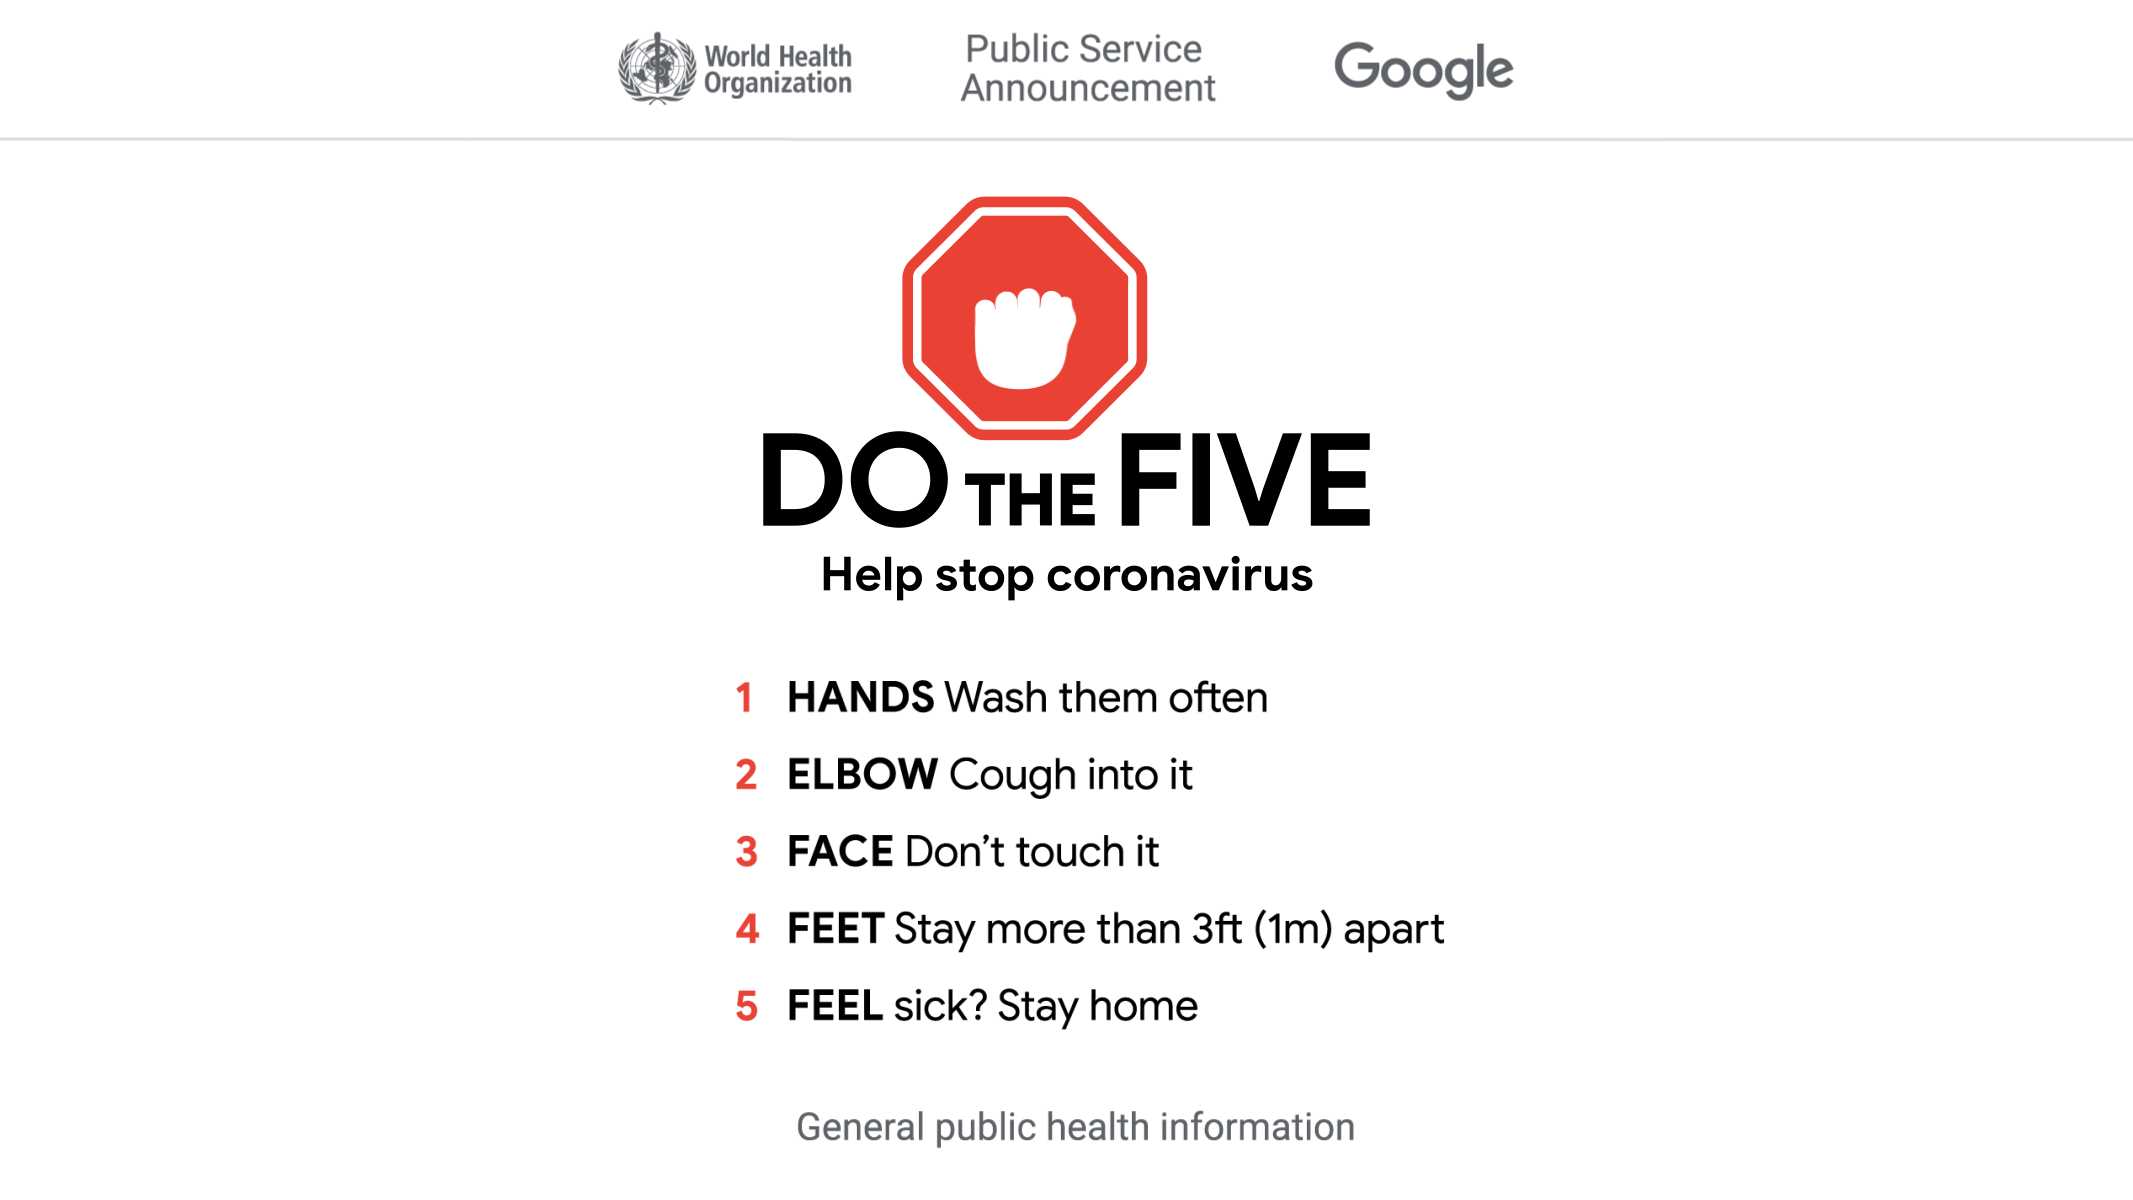

In [ ]:
current